In [6]:
import scanpy as sc

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cytopus as cp

In [8]:
DATA_DIR = '/path_to_data/'
fig_save_path = '/path_to_figures/'

In [9]:
blue_red = ['#0E518F','#DF480F']
color_map_clusters_nogrey = ["#FFFF00", "#1CE6FF", "#FF34FF", "#FF4A46", "#008941", "#006FA6", "#A30059", "#7A4900", "#0000A6", "#63FFAC", "#B79762", "#004D43", "#8FB0FF", "#997D87",
"#5A0007", "#809693", "#1B4400", "#4FC601", "#3B5DFF", "#4A3B53", "#FF2F80",
"#61615A", "#BA0900", "#6B7900", "#00C2A0", "#FFAA92", "#FF90C9", "#B903AA", "#D16100",
"#DDEFFF", "#000035", "#7B4F4B", "#A1C299", "#300018", "#0AA6D8", "#013349", "#00846F",
"#372101", "#FFB500", "#C2FFED", "#A079BF", "#CC0744", "#C0B9B2", "#C2FF99", "#001E09",
"#00489C", "#6F0062", "#0CBD66", "#EEC3FF", "#456D75", "#B77B68", "#7A87A1", "#788D66",
"#885578", "#FAD09F", "#FF8A9A", "#D157A0", "#BEC459", "#456648", "#0086ED", "#886F4C",
"#34362D", "#B4A8BD", "#00A6AA", "#452C2C", "#636375", "#A3C8C9", "#FF913F", "#938A81",
"#575329", "#00FECF", "#B05B6F", "#8CD0FF", "#3B9700", "#04F757", "#C8A1A1", "#1E6E00",
"#7900D7", "#A77500", "#6367A9", "#A05837", "#6B002C", "#772600", "#D790FF", "#9B9700",
"#549E79", "#FFF69F", "#201625", "#72418F", "#BC23FF", "#99ADC0", "#3A2465", "#922329",
"#5B4534", "#FDE8DC", "#404E55", "#0089A3", "#CB7E98", "#A4E804", "#324E72", "#6A3A4C"]

subtype_color_dict = {'global':'#FFFFFF','TAM':'#FFFF00',
                 'DC_cDC2A':'#1CE6FF',
                 'pDC':'#FF34FF',
                 'M-MDC':'#FF4A46',
                 'mono_c':'#008941',
                 'mast':'#006FA6',
                      'TAM_TRMac':'#456D75',
                 'DC_cDC1':'#A30059',
                 'Gr-MDC':'#7A4900',
                 'DC_Langerhans':'#0000A6',
                      'DC_AXLpos_ITGAXpos':'#0CBD66',
                      'DC_FDC_PTPRCpos':'#EEC3FF',
                'DC_cDC3':'#63FFAC',
                'CD8_T':'#B79762',
                'Treg':'#004D43',
                'CD4-T':'#8FB0FF',
                'CD8-T':'#997D87',
                 'NK':'#5A0007',
                 'gdT':'#809693',
                    'ILC3':'#7900D7',
                       'CD8_T_KLRG1pos_effector_preexhausted':'#4FC601',
                 'CD4_T_naive':'#3B5DFF',
                 'CD4_T_TH1':'#4A3B53',
                 'CD8_T_TRM':'#FF2F80',
                'CD8_T_TRM_exhausted':'#61615A',
                 'CD8_T_naive':'#BA0900',
                 'CD8_T_KLRG1pos_effector_preexhausted':'#6B7900',
             'CD4_T_naive_low_libsize':'#00C2A0',
                 'CD8_T_naive':'#FFAA92',
             'NK_CD56bright':'#FF90C9',
                 'CD8_T_TEM_effector_exhausted-progenitor':'#B903AA',
            'gdT':'#D16100',
              'CD8_T_KLRG1pos_effector_nonexhausted':'#DDEFFF',
              'CD8_T_TRM_exhausted_proliferating':'#000035',
            'CD4_T_TH1_proliferating':'#7B4F4B',
               'NK_CD56dim':'#A1C299',
               'Treg':'#300018',
                  'CD8_T_KLRG1pos_effector_preexhausted':'#0AA6D8',
                         'MDC':'#013349',
                 'DC':'#00846F',
                'mixed_T_M':'#636375',
                        'B_memory':'#372101',
                
                 'B_naive':'#FFB500',
                'plasma':'#C2FFED',
                'B_GC':'#A079BF',
                    'B_memory_switched':'#CC0744',
                'plasma_IgA':'#C0B9B2',
                 'B_memory_double_neg':'#C2FF99',
               'plasma_IgG':'#001E09',
                'plasmablast':'#00489C',
               'plasma_Be1':'#6F0062',
                     'M':'#B77B68',
                     'TNK':'#7A87A1',
                     'B':'#788D66',
                     'TAM_MKlike':'#885578',
                     'mono':'#34362D',
                     'mono_c':'#B4A8BD',
                     'mono_nc':'#00A6AA',
                     'ILC1':'#452C2C',
                     'CD4_T_TFH':'#A3C8C9',
                     'CD4_T_TFH_exhausted-progenitor':'#FF913F',
                     'CD4_T_TSCM':'#938A81',
                     'CD8_T_KLRG1neg_effector_preexhausted':'#575329',
                     'CD8_T_KLRG1pos_effector_exhausted':'#00FECF',
                     'CD8_T_TRM_nonexhausted':'#B05B6F',
                     'CD8_T_innate-like':'#8CD0FF',
                     'TNK_proliferating':'#3B9700',
                     'NK_CD56dim_proliferating':'#04F757',
                     'T':'#C8A1A1',
                     'T_proliferating':'#1E6E00',
                     'B_memory':"#BC23FF",
                      'B_naive':"#A77500",
                      'plasma':"#6367A9",
                 'B_GC':"#A05837",
                      'B_memory_switched':"#6B002C",
                 'B_naive':"#772600",
              'plasma_IgA':"#D790FF",
                'B_memory_double_neg':"#9B9700",
               'plasma_IgG':"#549E79",
                 'plasmablast':"#FFF69F",
                'plasma_IgG':"#201625",
                      
                      'MAIT':"#00847F",
                 'plasma_Be1':"#72418F",
                      'B':"#922329", 
                      'TNK':"#99ADC0",
                      'M': "#3A2465",
                      'nan':'#000000',
                      'B_GC_proliferating':'#5B4534',
                      'B_memory_switched_Be1':'#FDE8DC',
                      'B_memory_switched_proliferating':'#404E55',
                      'plasma_IgG_Be1':'#0089A3',
                       'B_proliferating':'#CB7E98'
                }

sc.set_figure_params(scanpy=True, dpi=150, dpi_save=300, frameon=False, vector_friendly=True, fontsize=7, figsize=None, color_map=None, format='pdf', facecolor=None, transparent=True, ipython_format='png2x')
sns.set_style('white')

# inspect adata

In [10]:
adata_path = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4_annotated_Spectra_lamba0.1_lambda0.1_rho0.001_kappaNone_delta0.001_labeled_recalc_embeddings_nooffsetmarkers.h5ad'
adata_path_CD8 = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4_annotated_Spectra_lamba0.1_lambda0.1_rho0.001_kappaNone_delta0.001_labeled_recalc_embeddings_CD8only.h5ad'

save_data = False
label_data = True
annotation_path = DATA_DIR + 'Spectra_dict_Tcell_Caushi_2021_NSCLC.json'
save_path_recalc = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4_annotated_Spectra_lamba0.1_lambda0.1_rho0.001_kappaNone_delta0.001_labeled_recalc_embeddings.h5ad'
save_path_recalc_CD8 = DATA_DIR+ 'TIL-X-NSCLC-X-Caushi-X-scRNAseq-X-2021-X-10.1038_s41586-021-03752-4_annotated_Spectra_lamba0.1_lambda0.1_rho0.001_kappaNone_delta0.001_labeled_recalc_embeddings_CD8only.h5ad'

In [11]:
adata = sc.read(adata_path)
adata

Only considering the two last: ['.001_labeled_recalc_embeddings_nooffsetmarkers', '.h5ad'].
Only considering the two last: ['.001_labeled_recalc_embeddings_nooffsetmarkers', '.h5ad'].


AnnData object with n_obs × n_vars = 556289 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_res.0.5'

#load the model
import pickle
with open(model_path, 'rb') as f:
    model = pickle.load(f)
     

In [2]:
import cytopus as cp
G = cp.kb.KnowledgeBase()

KnowledgeBase object containing 75 cell types and 201 cellular processes



In [8]:
#restrict to top 50 marker genes

marker_array = []
for i in adata.uns['SPECTRA_markers']:#['SPECTRA_markers_nooffset']:#
    marker_array.append(i[0:50])

marker_array = np.array(marker_array)
marker_array.shape

(173, 50)

In [ ]:
overlap_df = cp.tl.label_marker_genes(marker_array, G.processes, threshold = 0.2)
overlap_df

In [10]:
#add index to make labels unique
new_index =[]
for h,i in enumerate(overlap_df.index):
    new_index.append(str(h)+'-X-'+str(i))

overlap_df.index = new_index

In [11]:
adata.obsm['SPECTRA_cell_scores_df'] = pd.DataFrame(adata.obsm['SPECTRA_cell_scores'],columns=overlap_df.index,index=adata.obs_names)

In [12]:
#add cell score to adata.obs
if label_data:
    for i in adata.obsm['SPECTRA_cell_scores_df'].columns:
        adata.obs[i] = list(adata.obsm['SPECTRA_cell_scores_df'][i])
    

In [13]:
if save_data:
    adata.write(adata_save_path)
    print('saved adata to:',adata_save_path)

In [14]:
overlap_df['CD8-T_tumor-reactive-like_UP'].sort_values()

0-X-all_carnitine-shuttle             0.000
102-X-all_MHC-I-presentation          0.000
103-X-all_VAL-LEU-ILE_metabolism      0.000
104-X-all_exocytosis                  0.000
105-X-all_CYP_metabolism              0.000
                                      ...  
153-X-CD8-T_tumor-reactive-like_UP    0.250
166-X-CD8-T_tumor-reactive-like_UP    0.375
172-X-CD8-T_tumor-reactive-like_UP    0.375
161-X-CD8-T_tumor-reactive-like_UP    0.500
168-X-CD8-T_tumor-reactive-like_UP    0.750
Name: CD8-T_tumor-reactive-like_UP, Length: 173, dtype: float64

In [ ]:
factors_of_interest = ['168-X-CD8-T_tumor-reactive-like_UP',
                      '161-X-CD8-T_tumor-reactive-like_UP',]
overlap_df.loc[factors_of_interest]

In [20]:
#tumor reactivity
adata.uns['SPECTRA_markers'][168]

array(['CXCL13', 'VCAM1', 'HLA-DQA1', 'CCL5', 'CD8A', 'TNFRSF9', 'FABP5',
       'IFNG', 'HAVCR2', 'NKG7', 'PDCD1', 'CRTAM', 'CCL3', 'HMGB2',
       'MIR155HG', 'GZMH', 'CTLA4', 'AC243829.4', 'TNS3', 'NELL2', 'NAB1',
       'RBPJ', 'GALNT2', 'CLEC2B', 'DUSP4', 'APOBEC3G', 'LAG3', 'GEM',
       'ITGAE', 'ETV1', 'MIR4435-2HG', 'PECAM1', 'AKAP5', 'PLSCR1',
       'FAM3C', 'SNX9', 'HLA-DRB5', 'CD8B', 'ENTPD1', 'CLECL1',
       'LINC01871', 'STMN1', 'SNAP47', 'ADGRG1', 'ANXA5', 'CTSW', 'KCNK5',
       'TSC22D1', 'CHST12', 'GZMA', 'PRRG4', 'HMOX1', 'SIRPG', 'LYST',
       'RUNX2', 'KRT86', 'NBL1', 'SLC27A2', 'STAT5A', 'ITGB1', 'ACP5',
       'RALA', 'PRDX6', 'LRRN3', 'PARK7', 'TRAT1', 'HLA-DRA', 'CHN1',
       'IPCEF1', 'FASLG', 'CD2', 'EDARADD', 'TNFSF4', 'TTN', 'ABI3',
       'TP53INP1', 'CARD16', 'GAPDH', 'GBP5', 'LAYN', 'TNIP3', 'CBLB',
       'ATP6V0C', 'MIR181A1HG', 'WHRN', 'IQGAP1', 'RGS1', 'KLRK1',
       'NR3C1', 'CD200R1', 'IFITM2', 'GALM', 'TOMM5', 'SMC4', 'FTL',
       'GFOD1', '

In [39]:
adata_subset = adata[adata.obs['antigen'].isin(['EBV', 'InfluenzaA', 'MANA',])]
adata_subset

View of AnnData object with n_obs × n_vars = 1432 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_re

In [ ]:
columns_of_interest = ['antigen','168-X-CD8-T_tumor-reactive-like_UP','response','mpr','tissue']
adata_subset_CD8 = adata_subset[adata_subset.obs['annotation']=='CD8-T']
adata_subset_df_CD8 = adata_subset_CD8.obs[columns_of_interest]
adata_subset_df_CD8

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Caushi_CD8_168-X-CD8-T_tumor-reactive-like_UP.svg


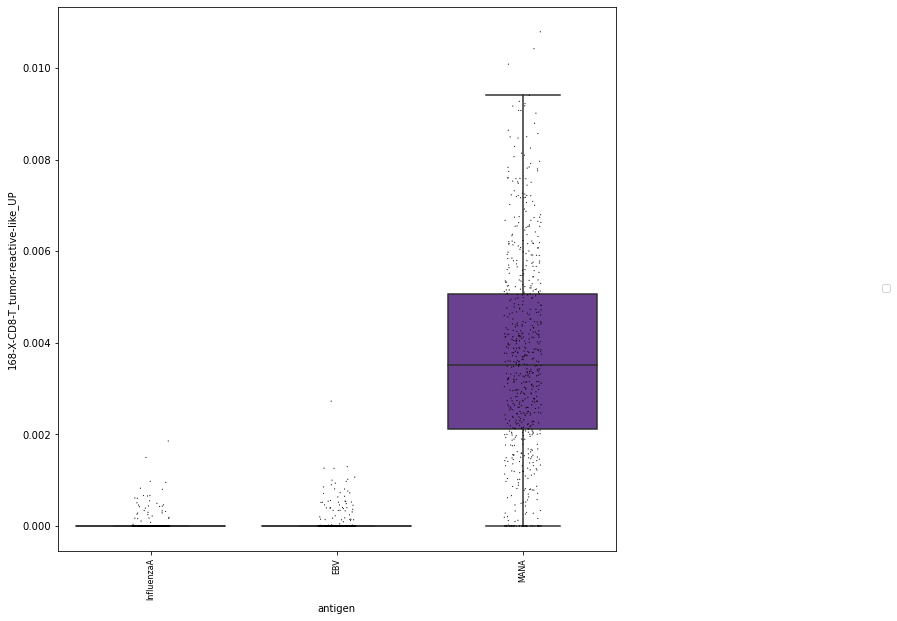

In [41]:
#plot
factor='168-X-CD8-T_tumor-reactive-like_UP'
save_name ='Caushi_CD8_'+factor+'.svg'
hue_order = ['InfluenzaA','EBV','MANA']
plt.subplots(figsize=(10,10))
sns.boxplot(data=adata_subset_df_CD8,x='antigen', 
                y=factor, hue=None, hue_order=None, order=hue_order, 
                orient=None, color=None, palette=blue_red+['#6a329f'], saturation=0.75, width=0.8, 
                dodge=True, fliersize=0, linewidth=None, whis=1.5, ax=None)
sns.stripplot(data=adata_subset_df_CD8,x='antigen', 
                y=factor, hue=None, hue_order=None, order=hue_order, 
                orient=None, color='#000000',s=1,
                dodge=True, linewidth=None, ax=None)
#plt.xlim(-25,100)
plt.legend(bbox_to_anchor=[1.5, 0.5])
plt.xticks(rotation=90,size=8)
plt.savefig(fig_save_path+save_name)
adata_subset_df_CD8.to_csv(fig_save_path + 'source_data/'+ save_name[:-4]+'.csv')
print(save_name)

In [68]:
def two_sample_test(df,data_column, comparison_column,sample_column=None, test='matched-pairs-signed-rank'):
    '''
    perform a two-sample test between two groups in a dataframe
    df, pandas.DataFrame containing the data and columns with the boolean categories to compare 'comparison_column' and 
    'sample_column' containing the samples (necessary for paired test only)
    data_column: str, column in df containing the data
    comparison_column: str, column in df containing the boolean Categories to be compared
    sample_column: str, column in df containing the sample identity (categorical)
    test: str, indicating type of test
    returns: test result (scipy object), effect size (list)
    '''
    import pandas as pd
    import scipy
    import numpy as np
    if test=='matched-pairs-signed-rank' and sample_column==None:
        raise ValueError('You must provide the name of the column containing the sample information if test=<matched-pairs-signed-rank>')
    df_subset_1 = df[df[comparison_column]]
    df_subset_2 = df[~df[comparison_column]]
    if test=='matched-pairs-signed-rank':
        #make sure samples are identical for matched pairs test
        intersection = set(df_subset_1[sample_column]).intersection(set(df_subset_2[sample_column]))
        complement = set(df_subset_1[sample_column]).difference(set(df_subset_2[sample_column]))
        print('filtering out samples:',complement)
        df_subset_1 = df_subset_1[df_subset_1[sample_column].isin(intersection)].sort_values(sample_column)
        df_subset_2 = df_subset_2[df_subset_2[sample_column].isin(intersection)].sort_values(sample_column)
        #double check samples are identical
        print('samples are identical:',list(df_subset_1[sample_column])==list(df_subset_2[sample_column]))
        #compare
        
        a = list(df_subset_1[data_column])
        b = list(df_subset_2[data_column])

        test = scipy.stats.wilcoxon(a, b, zero_method='wilcox', correction=False, 
                         alternative='two-sided',  axis=0, 
                         nan_policy='propagate')
        effect = (np.mean(a)- np.mean(b))/np.std(a+b)
    if test=='mann-whitney':
        #make sure samples are identical for matched pairs test
        a = list(df[df[comparison_column]][data_column])
        b = list(df[~df[comparison_column]][data_column])

        test = scipy.stats.mannwhitneyu(a, b, use_continuity=True, alternative='two-sided', 
                                        axis=0, method='auto', nan_policy='propagate')
        effect = (np.mean(a)- np.mean(b))/np.std(a+b)
    return test, effect

In [69]:
stats_df = adata_subset_df_CD8.copy()
stats_df_influenzaMANA = stats_df[stats_df['antigen'].isin(['InfluenzaA','MANA'])]
stats_df_influenzaMANA['antigen'] =  stats_df_influenzaMANA['antigen']=='MANA'
stats_df_EBVMANA = stats_df[stats_df['antigen'].isin(['EBV','MANA'])]
stats_df_EBVMANA['antigen'] =  stats_df_EBVMANA['antigen']=='MANA'

/scratch/lsftmp/16790265.tmpdir/ipykernel_33627/3691835991.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_influenzaMANA['antigen'] =  stats_df_influenzaMANA['antigen']=='MANA'
/scratch/lsftmp/16790265.tmpdir/ipykernel_33627/3691835991.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_df_EBVMANA['antigen'] =  stats_df_EBVMANA['antigen']=='MANA'


In [70]:
two_sample_test(stats_df_influenzaMANA,'168-X-CD8-T_tumor-reactive-like_UP', 
                'antigen',sample_column=None, test='mann-whitney')

(MannwhitneyuResult(statistic=148361.0, pvalue=5.1982722047996754e-101),
 1.4528954595680563)

In [71]:
two_sample_test(stats_df_EBVMANA,'168-X-CD8-T_tumor-reactive-like_UP', 
                'antigen',sample_column=None, test='mann-whitney')

(MannwhitneyuResult(statistic=164536.0, pvalue=6.044488452158876e-104),
 1.438877207097682)

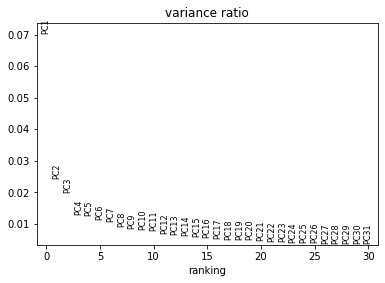

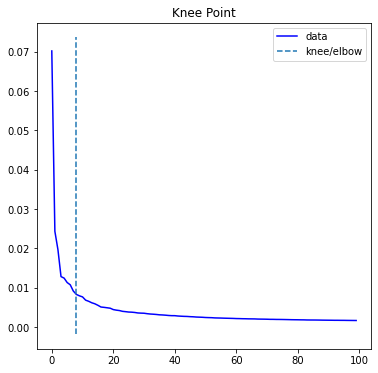

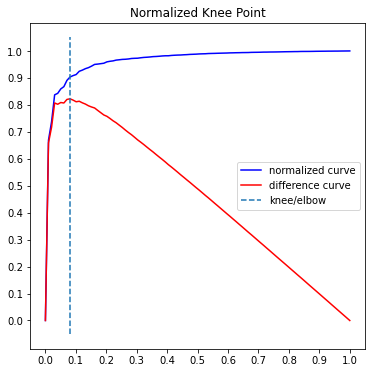

Kneepoint happens at PC: 8
8 PC explain 17.091153196378475 % of variance
2 PC explain 9.453415317732961 % of variance
3 PC explain 11.423186956969253 % of variance
4 PC explain 12.709240698318073 % of variance
5 PC explain 13.957636689051123 % of variance
6 PC explain 15.093333475515072 % of variance
7 PC explain 16.17179483631257 % of variance
8 PC explain 17.091153196378475 % of variance
9 PC explain 17.92462430168986 % of variance
10 PC explain 18.722647563462388 % of variance
11 PC explain 19.49344722972617 % of variance
12 PC explain 20.182093250626462 % of variance
13 PC explain 20.841223777296587 % of variance
14 PC explain 21.4630759614444 % of variance
15 PC explain 22.05911193377532 % of variance
16 PC explain 22.616756118382614 % of variance
17 PC explain 23.130537937692274 % of variance
18 PC explain 23.636049513615898 % of variance
19 PC explain 24.130791022159258 % of variance
20 PC explain 24.614686480420154 % of variance
21 PC explain 25.063679562676572 % of variance
se

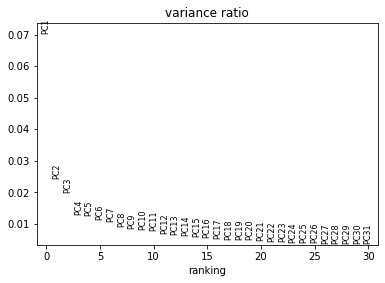

In [51]:
#select optimal number of PCs and recalculate PCs
from scrnaseq_preprocessing_utils import *

number_of_PC_used = calculate_optimal_PC(adata, min_PC = 50, min_var=25, n_comps=100, use_hv=None)

In [52]:
#recalc umap
sc.pp.neighbors(adata, n_neighbors=10, method= 'umap', n_pcs=number_of_PC_used,random_state=0)
sc.tl.umap(adata,random_state=0)

In [ ]:
#recalc tsne
sc.tl.tsne(adata, random_state = 7, n_pcs=number_of_PC_used)

In [58]:
if save_data:
    adata.write(save_path_recalc)

In [7]:
adata_CD8 = adata[adata.obs['annotation']=='CD8-T']

In [12]:
#recalc umap
sc.pp.neighbors(adata_CD8, n_neighbors=10, method= 'umap', n_pcs=adata_CD8.uns['pca']['variance_ratio'].shape[0],
                random_state=0)

/scratch/lsftmp/16790265.tmpdir/ipykernel_477113/3053395668.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.neighbors(adata_CD8, n_neighbors=10, method= 'umap', n_pcs=adata_CD8.uns['pca']['variance_ratio'].shape[0],


In [13]:
#recalc fdl
sc.tl.draw_graph(adata_CD8, layout='fa', init_pos=None, root=None, random_state=0, n_jobs=None, adjacency=None, key_added_ext=None, neighbors_key=None, obsp=None, copy=False)

In [14]:
if save_data:
    adata_CD8.write(save_path_recalc_CD8)

In [47]:
adata_CD8 = sc.read(adata_path_CD8)
adata_CD8

Only considering the two last: ['.001_labeled_recalc_embeddings_CD8only', '.h5ad'].
Only considering the two last: ['.001_labeled_recalc_embeddings_CD8only', '.h5ad'].


AnnData object with n_obs × n_vars = 251777 × 22223
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.ribo', 'barcode', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'sample', 'files', 'patient_id', 'tissue', 'batch', 'chip', 'lane', 'time', 'sample_number', 'multilane.tn', 'multilane', 'mana.include', 'pp3.mana', 'is2.mana', 'jm6.mana', 'center', 'cohort', 'response', 'relapse', 'patno', 'patient', 'imid', 'geid', 'chemo', 'pfs', 'recurrence_n', 'radio_change', 'resi_tumor', 'mpr', 'age', 'sex', 'smoke', 'pack_year', 'hist', 'death', 'date_death', 'clinical_recurrence', 'biopsy_recurrence', 'recurrence', 'date_recurrence', 'path_resec', 'pre_stage', 'pre_stage_com', 'ae', 'grade', 'recist', 'path_down', 'pre_pd.', 'post_pd.', 'mutation', 'number_seq_alteration', 'non_redundant_neoantigens_5000', 'non_redundant_neoantigens_500', 'sample.n', 'integrated_snn_res.0.7', 'seurat_clusters', 'integrated_snn_res.0.3', 'integrated_snn_res.0.6', 'integrated_snn_res.0.5'

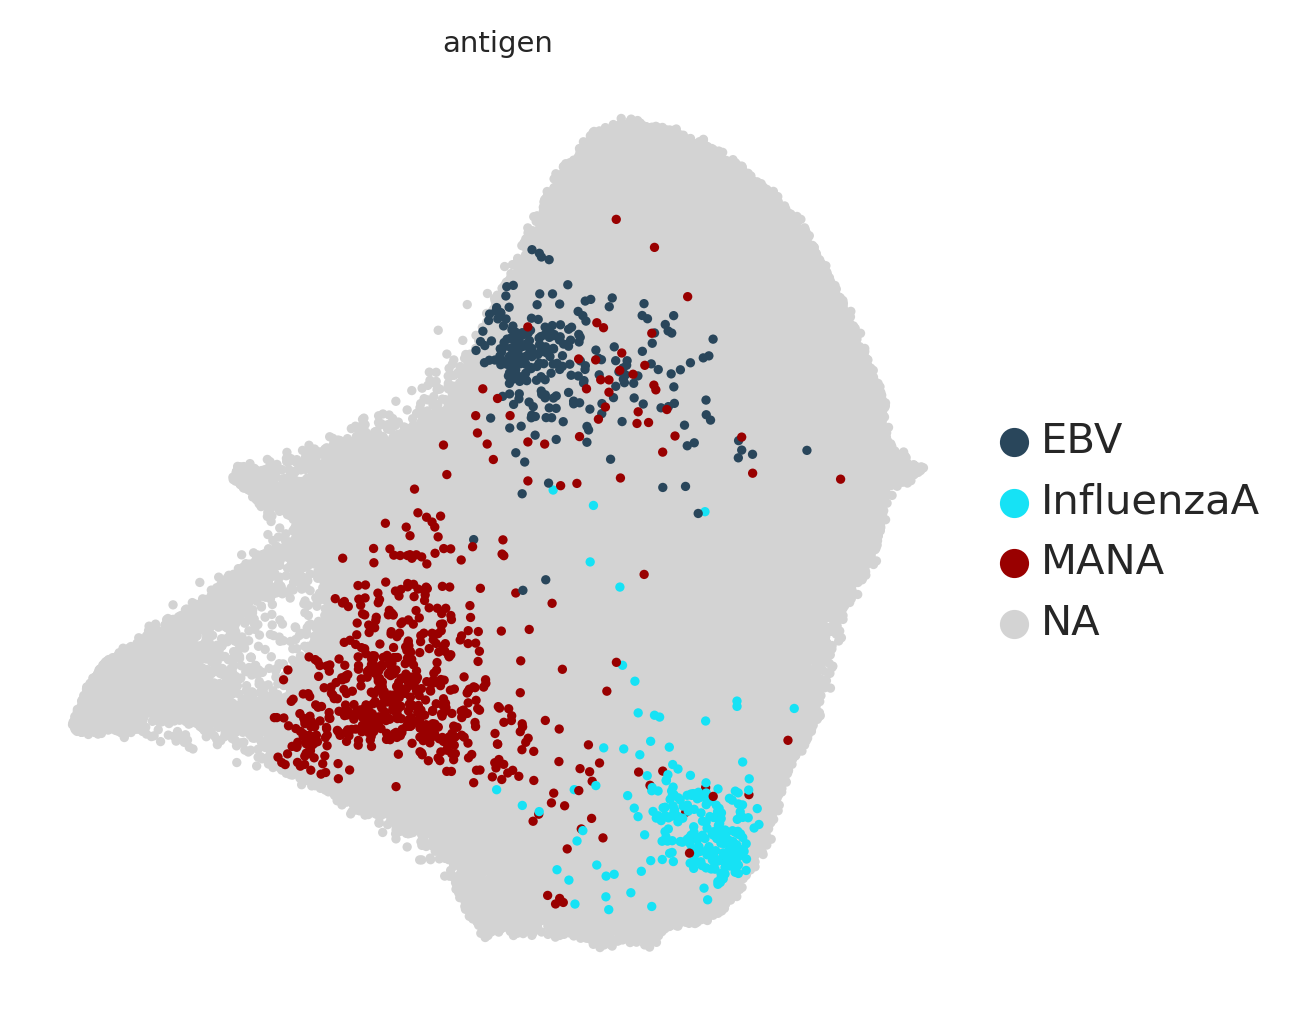

In [52]:
sc.pl.draw_graph(adata_CD8, color = ['antigen'], s = 20, palette= {'EBV':'#29465B',
                                                                  'InfluenzaA':'#16E2F5',
                                                                  'MANA':'#990000'}, 
                 legend_fontsize = 10, vmin=0)


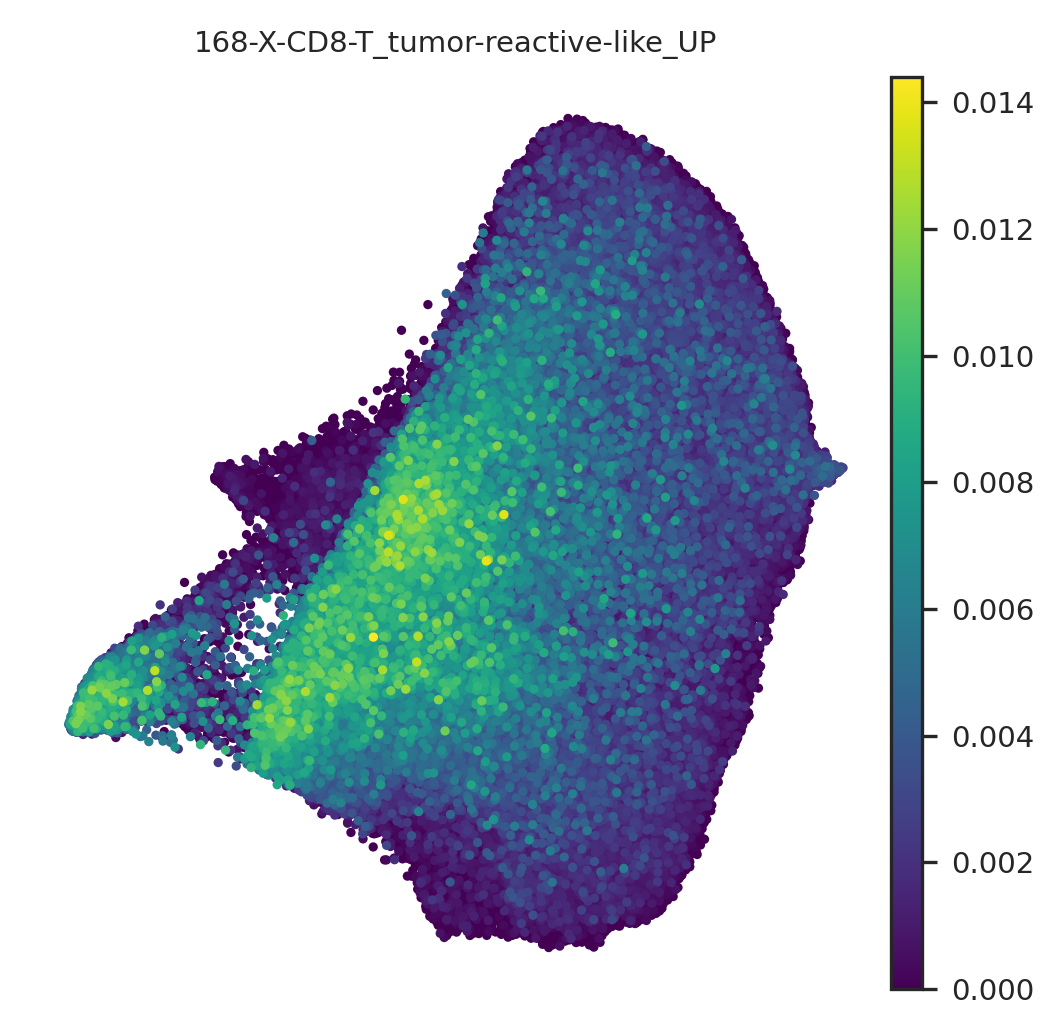

In [53]:
sc.pl.draw_graph(adata_CD8, color = ['168-X-CD8-T_tumor-reactive-like_UP'], s = 20, cmap= 'viridis', 
                 legend_fontsize = 10, vmin=0)


In [16]:
input_genes = set(G.processes['CD8-T_tumor-reactive-like_UP'])


Bassez_et_al = set(['MKI67', 'TNFRSF18', 'ENTPD1', 'ITGAE', 'CXCL13', 'TNFRSF9',
       'IFNG', 'GZMB', 'CCL3', 'GNLY', 'FASLG', 'CCR1', 'PRF1', 'GZMH',
       'HAVCR2', 'SLA', 'BATF', 'SH2D2A', 'LCP2', 'GBP1', 'ITM2A', 'GZMA',
       'RHOH', 'ZBTB32', 'DOK2', 'BTN3A2', 'LAX1', 'IL10RB', 'CIC',
       'TESPA1', 'SEMA7A', 'LTA', 'GFI1', 'CD8B', 'TNFRSF4', 'GADD45G',
       'FBXW7', 'STAT5A', 'NFATC1', 'KRT86', 'CD38', 'NR4A3', 'GZMM',
       'GALNT2', 'LCK', 'MTHFD2', 'RBPJ', 'LAG3', 'LAYN', 'LINC02195'])


Caushi_et_al = set(adata.uns['SPECTRA_markers'][168][:50])


In [17]:
Caushi_et_al.intersection(Bassez_et_al) - input_genes

{'CCL3', 'CD8B', 'GALNT2', 'GZMH', 'HAVCR2', 'LAG3', 'RBPJ'}

In [18]:
Bassez_et_al.intersection(Bassez_et_al).intersection(Caushi_et_al).intersection(input_genes)

{'CXCL13', 'ENTPD1', 'GZMA', 'IFNG', 'ITGAE', 'TNFRSF9'}

saved Figure to: /data/peer/wallet/Jupyter/SPADE_Peer_validation/revision_figures/Venn_Caushi_0.1_Basseztumorreac.svg


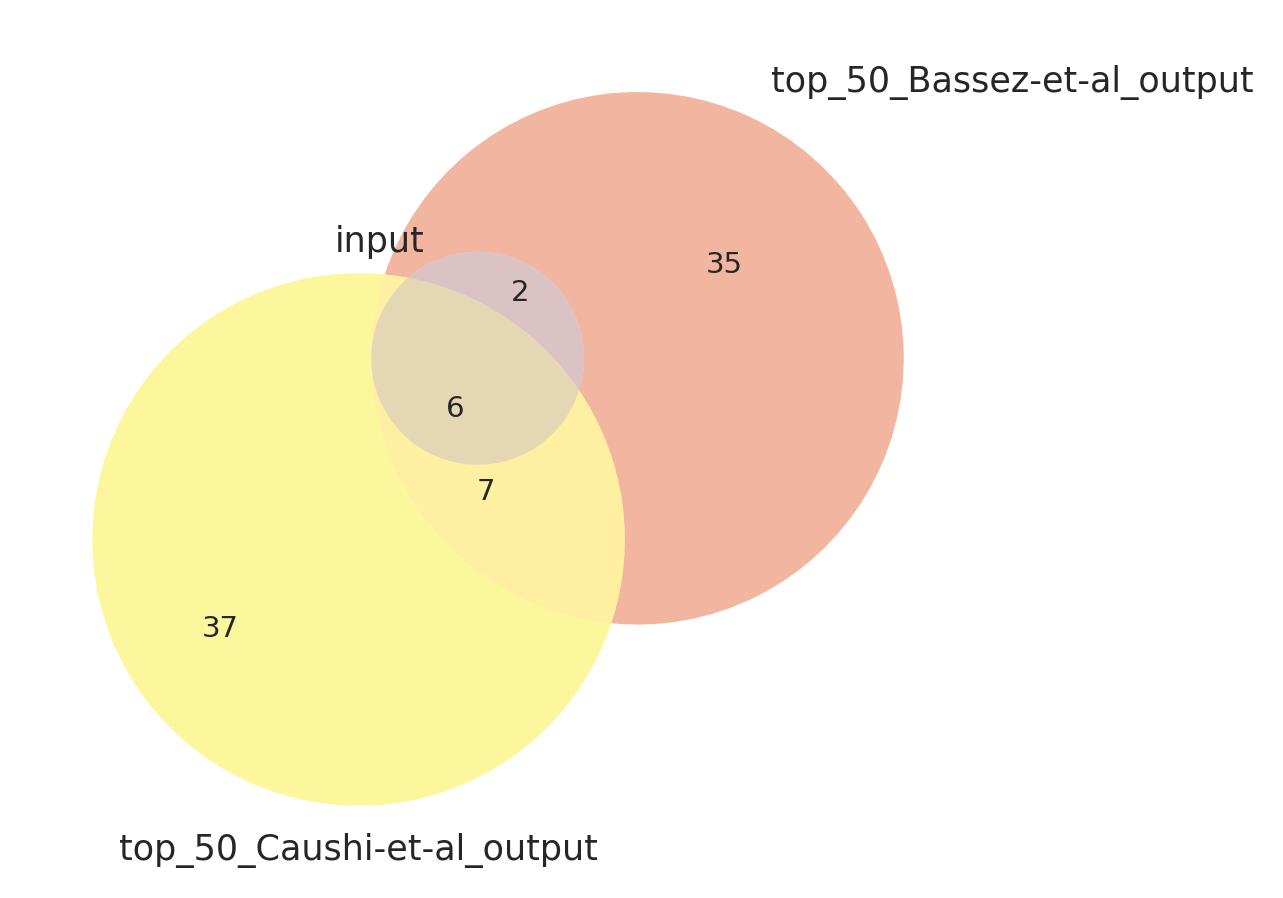

In [24]:
from matplotlib_venn import venn3, venn3_circles

#get intersections and set differerences 
a = len((input_genes-Bassez_et_al)-Caushi_et_al)
b = len((Bassez_et_al-input_genes)-Caushi_et_al)
c = len((Bassez_et_al.intersection(input_genes))-Caushi_et_al)
d = len((Caushi_et_al-Bassez_et_al)-input_genes)
e = len((Caushi_et_al.intersection(input_genes))-Bassez_et_al)
f = len((Caushi_et_al.intersection(Bassez_et_al))-input_genes)
g = len(Caushi_et_al.intersection(Bassez_et_al).intersection(input_genes))

venn3(subsets=(a,b,c,d,e,f,g),set_labels=('input','top_50_Bassez-et-al_output','top_50_Caushi-et-al_output'),
     set_colors= blue_red+['#F9EB0C'])
save_fig_path = fig_save_path+'Venn_Caushi_0.1_Bassez'+'tumorreac'+'.svg'
plt.savefig(save_fig_path,dpi=300)
print('saved Figure to:',save_fig_path)